In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

# CSV 파일 불러오기

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/GC/boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [62]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [63]:
'''
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

'\n| MedInc | 블록의 중간 소득 |\n| HouseAge | 블록의 중간 주택 연도 |\n| AveRooms | 주택 1가구당 평균 방의 수 |\n| AveBedrms | 주택 1가구당 평균 침실의 수 |\n| Population | 인구 |\n| AveOccup |  average house occupancy 평균 주택점유율 |\n| Latitude | 위도 |\n| Longitude | 경도 |\n'

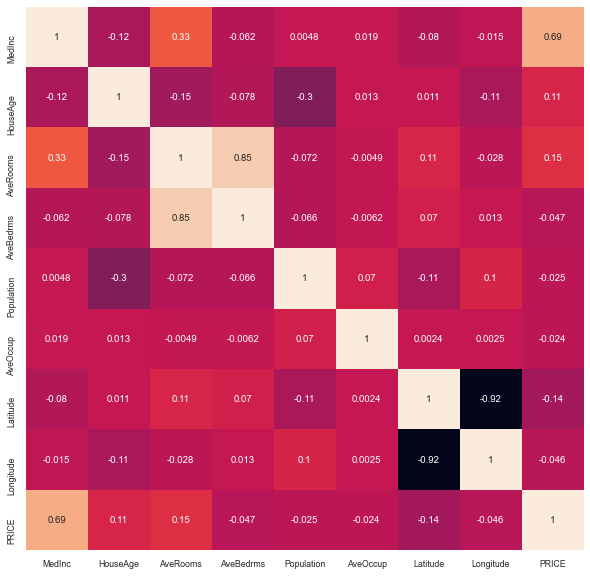

In [64]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
X = df.drop('PRICE',axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [67]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

# 원-핫 인코딩

In [68]:
Y = pd.get_dummies(y).values

# 딥러닝 입력을 위해 Numpy로 변환

In [69]:
X = X.values

In [70]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [71]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: PRICE, Length: 20640, dtype: float64

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [73]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((16512, 8), (16512, 3842), (4128, 8), (4128, 3842))

In [74]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 8)                 72        
                                                                 
 dense_29 (Dense)            (None, 30)                270       
                                                                 
 dense_30 (Dense)            (None, 30)                930       
                                                                 
 dense_31 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1303 (5.09 KB)
Trainable params: 1303 (5.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)


Epoch 1/10
516/516 [==============================] - 2s 2ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 2/10
516/516 [==============================] - 1s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/10
516/516 [==============================] - 1s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 6.6189e-04 - val_mse: 6.6189e-04
Epoch 4/10
516/516 [==============================] - 1s 2ms/step - loss: 8.2508e-04 - mse: 8.2508e-04 - val_loss: 8.4133e-04 - val_mse: 8.4133e-04
Epoch 5/10
516/516 [==============================] - 1s 2ms/step - loss: 6.6737e-04 - mse: 6.6737e-04 - val_loss: 7.1655e-04 - val_mse: 7.1655e-04
Epoch 6/10
516/516 [==============================] - 1s 2ms/step - loss: 5.1361e-04 - mse: 5.1361e-04 - val_loss: 4.8729e-04 - val_mse: 4.8729e-04
Epoch 7/10
516/516 [==============================] - 1s 2ms/step - loss: 4.0089e-04 - mse: 4.0089e-04 - val_loss: 4.0278e-04 - val_mse: 4.0278e-04
Epoc

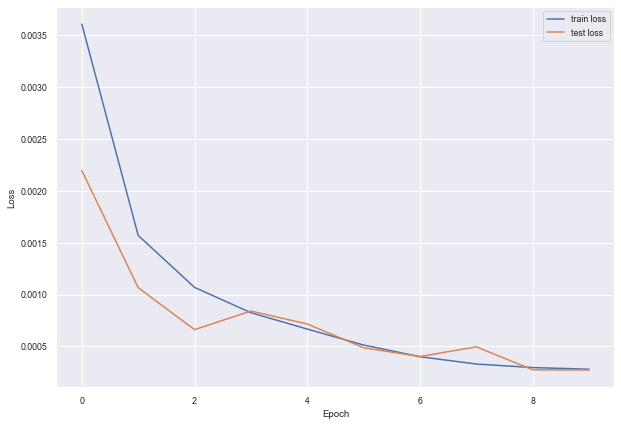

In [76]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [77]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 1ms/step - loss: 2.7297e-04 - mse: 2.7297e-04


[0.00027297090855427086, 0.00027297090855427086]